https://github.com/home-assistant/home-assistant/blob/master/homeassistant/components/sensor/random.py

https://docs.python.org/2/library/random.html

**random.randrange(start, stop[, step])** 

Return a randomly selected element from range(start, stop, step). This is equivalent to choice(range(start, stop, step)), but doesn’t actually build a range object.

In [26]:
from random import randrange
import matplotlib.pyplot as plt
%matplotlib inline
figure_size = (15,3)

ATTR_MAXIMUM = 'maximum'
ATTR_MINIMUM = 'minimum'

In [27]:
class RandomSensor():
    """Representation of a Random number sensor."""

    def __init__(self, name, minimum, maximum):
        """Initialize the Random sensor."""
        self._name = name
        self._minimum = minimum
        self._maximum = maximum
        self._state = None

    @property
    def name(self):
        """Return the name of the device."""
        return self._name

    @property
    def state(self):
        """Return the state of the device."""
        return self._state

    @property
    def device_state_attributes(self):
        """Return the attributes of the sensor."""
        return {
            ATTR_MAXIMUM: self._maximum,
            ATTR_MINIMUM: self._minimum,
        }

    def update(self):
        """Get a new number and updates the states."""
        from random import randrange
        self._state = randrange(self._minimum, self._maximum + 1)  # + 1 to ensure we get the max

In [28]:
minimum = 0 
maximum = 20
simple_rand = RandomSensor('simple', minimum, maximum)

20
CPU times: user 279 ms, sys: 6.55 ms, total: 286 ms
Wall time: 283 ms


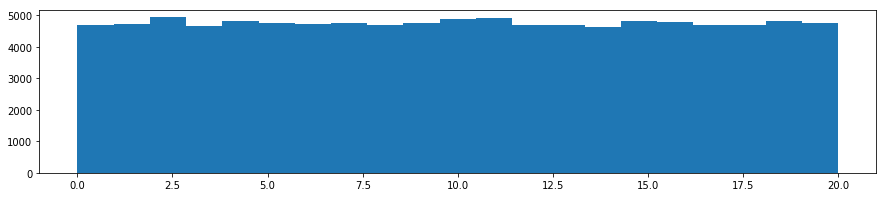

In [33]:
%%time
num_meas = 100000
measurements = []

for i in range(num_meas):
    simple_rand.update()
    measurements.append(simple_rand.state)

print(max(measurements))
plt.figure(figsize=figure_size)
plt.hist(measurements, bins = maximum + 1);

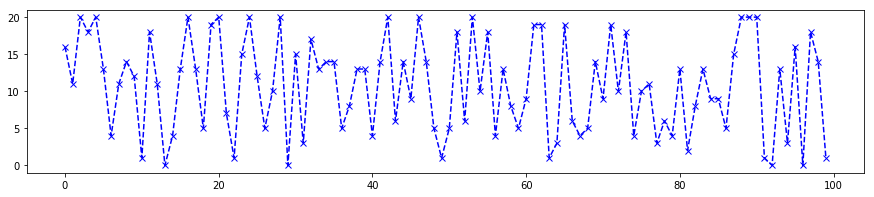

In [31]:
plt.figure(figsize=figure_size)
plt.plot(measurements, 'bx--');